# <div style="text-align: center">A Data Science Framework for Elo </div>
### <div align="center"><b>Quite Practical and Far from any Theoretical Concepts</b></div>
<div style="text-align:center">last update: <b>11/28/2018</b></div>
<img src='http://s8.picofile.com/file/8344134250/KOpng.png'>
You can Fork and Run this kernel on **Github**:
> ###### [ GitHub](https://github.com/mjbahmani/10-steps-to-become-a-data-scientist)


 <a id="1"></a> <br>
## 1- Introduction
**[Elo](https://www.cartaoelo.com.br/)** has defined a competition in **Kaggle**. A realistic and attractive data set for data scientists.
on this notebook, I will provide a **comprehensive** approach to solve Elo Recommendation problem.

I am open to getting your feedback for improving this **kernel**.

<a id="top"></a> <br>
## Notebook  Content
1. [Introduction](#1)
1. [Data Science Workflow for Elo](#2)
1. [Problem Definition](#3)
    1. [Business View](#4)
        1. [Real world Application Vs Competitions](#31)
1. [Problem feature](#7)
    1. [Aim](#8)
    1. [Variables](#9)
    1. [ Inputs & Outputs](#10)
    1. [Evaluation](#10)
1. [Select Framework](#11)
    1. [Import](#12)
    1. [Version](#13)
    1. [Setup](#14)
1. [Exploratory data analysis](#15)
    1. [Data Collection](#16)
        1. [data_dictionary Analysis](#17)
        1. [Explorer Dataset](#18)
    1. [Data Cleaning](#19)
    1. [Data Preprocessing](#20)
    1. [Data Visualization](#23)
        1. [countplot](#61)
        1. [pie plot](#62)
        1. [Histogram](#63)
        1. [violin plot](#64)
        1. [kdeplot](#65)
1. [Apply Learning](#24)
1. [Conclusion](#25)
1. [References](#26)

-------------------------------------------------------------------------------------------------------------

 **I hope you find this kernel helpful and some <font color="red"><b>UPVOTES</b></font> would be very much appreciated**
 
 -----------

<a id="2"></a> <br>
## 2- A Data Science Workflow for Elo
Of course, the same solution can not be provided for all problems, so the best way is to create a **general framework** and adapt it to new problem.

**You can see my workflow in the below image** :

 <img src="http://s8.picofile.com/file/8342707700/workflow2.png"  />

**You should feel free	to	adjust 	this	checklist 	to	your needs**
###### [Go to top](#top)

<a id="3"></a> <br>
## 3- Problem Definition
I think one of the important things when you start a new machine learning project is Defining your problem. that means you should understand business problem.( **Problem Formalization**)
<img src='http://s8.picofile.com/file/8344103134/Problem_Definition2.png' width=400 height=400>
>  We are predicting a **loyalty score** for each card_id represented in test.csv and sample_submission.csv.

## 3-1 About Elo
 [Elo](https://www.cartaoelo.com.br/) is one of the largest **payment brands** in Brazil, has built partnerships with merchants in order to offer promotions or discounts to cardholders. But 
1. do these promotions work for either the consumer or the merchant?
1. Do customers enjoy their experience? 
1. Do merchants see repeat business? 

**Personalization is key**.
<a id="4"></a> <br>
## 3-2 Business View 
**Elo** has built machine learning models to understand the most important aspects and preferences in their customers’ lifecycle, from food to shopping. But so far none of them is specifically tailored for an individual or profile. This is where you come in.
<a id="31"></a> <br>
### 3-2-1 Real world Application Vs Competitions
Just a simple comparison between real-world apps with competitions:
<img src="http://s9.picofile.com/file/8339956300/reallife.png" height="600" width="500" />

###### [Go to top](#top)

<a id="7"></a> <br>
## 4- Problem Feature
Problem Definition has four steps that have illustrated in the picture below:


1. Aim
1. Variable
1. Inputs & Outputs
1. Evaluation
<a id="8"></a> <br>

### 4-1 Aim
Develop algorithms to identify and serve the most relevant opportunities to individuals, by uncovering signal in customer loyalty.
We are predicting a **loyalty score** for each card_id represented in test.csv and sample_submission.csv.

<a id="9"></a> <br>
### 4-2 Variables
The data is formatted as follows:

train.csv and test.csv contain card_ids and information about the card itself - the first month the card was active, etc. train.csv also contains the target.

historical_transactions.csv and new_merchant_transactions.csv are designed to be joined with train.csv, test.csv, and merchants.csv. They contain information about transactions for each card, as described above.

merchants can be joined with the transaction sets to provide additional merchant-level information.


<a id="10"></a> <br>
### 4-3 Inputs & Outputs
we use train.csv and test.csv as Input and we should upload a  submission.csv as Output

### 4-4 Evaluation
Submissions are scored on the root mean squared error. RMSE(Root Mean Squared Error) is defined as:
<img src='https://www.includehelp.com/ml-ai/Images/rmse-1.jpg'>
where y^ is the predicted loyalty score for each card_id, and y is the actual loyalty score assigned to a card_id.

**<< Note >>**
> You must answer the following question:
How does your company expect to use and benefit from **your model**.
###### [Go to top](#top)

<a id="11"></a> <br>
## 5- Select Framework
After problem definition and problem feature, we should select our **framework** to solve the **problem**.
What we mean by the framework is that  the programming languages you use and by what modules the problem will be solved.
###### [Go to top](#top)

<a id="12"></a> <br>
## 5-2 Import

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

<a id="13"></a> <br>
## 5-3 version

In [15]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))


matplotlib: 2.2.3
sklearn: 0.20.1
scipy: 1.1.0
seaborn: 0.9.0
pandas: 0.23.4
numpy: 1.15.4
Python: 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]


<a id="14"></a> <br>
## 5-4 Setup

A few tiny adjustments for better **code readability**

In [16]:
sns.set(style='white', context='notebook', palette='deep')
warnings.filterwarnings('ignore')
sns.set_style('white')
%matplotlib inline

<a id="15"></a> <br>
## 6- EDA
 In this section, you'll learn how to use graphical and numerical techniques to begin uncovering the structure of your data. 
 
* Which variables suggest interesting relationships?
* Which observations are unusual?
* Analysis of the features!

By the end of the section, you'll be able to answer these questions and more, while generating graphics that are both insightful and beautiful.  then We will review analytical and statistical operations:

1. Data Collection
1. Visualization
1. Data Cleaning
1. Data Preprocessing
<img src="http://s9.picofile.com/file/8338476134/EDA.png">

 ###### [Go to top](#top)

<a id="16"></a> <br>
## 6-1 Data Collection
**Data collection** is the process of gathering and measuring data, information or any variables of interest in a standardized and established manner that enables the collector to answer or test hypothesis and evaluate outcomes of the particular collection.[techopedia]

I start Collection Data by the training and testing datasets into **Pandas DataFrames**.
###### [Go to top](#top)

In [17]:
train = pd.read_csv('../input/train.csv', parse_dates=["first_active_month"] )
test = pd.read_csv('../input/test.csv' ,parse_dates=["first_active_month"] )
merchants=pd.read_csv('../input/merchants.csv')


**<< Note 1 >>**

* Each **row** is an observation (also known as : sample, example, instance, record).
* Each **column** is a feature (also known as: Predictor, attribute, Independent Variable, input, regressor, Covariate).
###### [Go to top](#top)

## 6-1-1 data_dictionary Analysis
Elo Provides a excel file to describe about data. It has four sheet and we have just read them with below code:

In [18]:
data_dictionary_train=pd.read_excel('../input/Data_Dictionary.xlsx',sheet_name='train')
data_dictionary_history=pd.read_excel('../input/Data_Dictionary.xlsx',sheet_name='history')
data_dictionary_new_merchant_period=pd.read_excel('../input/Data_Dictionary.xlsx',sheet_name='new_merchant_period')
data_dictionary_merchant=pd.read_excel('../input/Data_Dictionary.xlsx',sheet_name='merchant')

### 6-1-1-1 data_dictionary_train

In [19]:
data_dictionary_train.head(10)
# what we know about train:

,train.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Unique card identifier
3,first_active_month,"'YYYY-MM', month of first purchase"
4,feature_1,Anonymized card categorical feature
5,feature_2,Anonymized card categorical feature
6,feature_3,Anonymized card categorical feature
7,target,Loyalty numerical score calculated 2 months af...


### 6-1-1-2 data_dictionary_history

In [20]:
data_dictionary_history.head(10)
# what we know about history:

,historical_transactions.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Card identifier
3,month_lag,month lag to reference date
4,purchase_date,Purchase date
5,authorized_flag,"Y' if approved, 'N' if denied"
6,category_3,anonymized category
7,installments,number of installments of purchase
8,category_1,anonymized category
9,merchant_category_id,Merchant category identifier (anonymized )


### 6-1-1-3 data_dictionary_new_merchant_period

In [21]:
data_dictionary_new_merchant_period.head(10)
# what we know about new_merchant_period:

,new_merchant_period.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Card identifier
3,month_lag,month lag to reference date
4,purchase_date,Purchase date
5,authorized_flag,"Y' if approved, 'N' if denied"
6,category_3,anonymized category
7,installments,number of installments of purchase
8,category_1,anonymized category
9,merchant_category_id,Merchant category identifier (anonymized )


### 6-1-1-4  data_dictionary_merchant:

In [22]:
data_dictionary_merchant.head(30)
# what we know about merchant:

,merchants.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,merchant_id,Unique merchant identifier
3,merchant_group_id,Merchant group (anonymized )
4,merchant_category_id,Unique identifier for merchant category (anony...
5,subsector_id,Merchant category group (anonymized )
6,numerical_1,anonymized measure
7,numerical_2,anonymized measure
8,category_1,anonymized category
9,most_recent_sales_range,Range of revenue (monetary units) in last acti...


## 6-1-2 Train Analysis

In [23]:
train.sample(1) 

,first_active_month,card_id,feature_1,feature_2,feature_3,target
176371,2015-11-01,C_ID_425bfd2291,3,1,1,-1.088887


In [24]:
test.sample(1) 

,first_active_month,card_id,feature_1,feature_2,feature_3
45750,2017-10-01,C_ID_1dea159575,2,1,0


Or you can use others command to explorer dataset, such as 

In [25]:
train.tail(1)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
201916,2017-07-01,C_ID_92c9984c58,3,1,1,-1.859413


<a id="17"></a> <br>
## 6-1-1 Features
Features can be from following types:
* numeric
* categorical
* ordinal
* datetime
* coordinates

Find the type of features in **Qoura dataset**?!

For getting some information about the dataset you can use **info()** command.

In [26]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null datetime64[ns]
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 9.2+ MB
None


In [27]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
first_active_month    123622 non-null datetime64[ns]
card_id               123623 non-null object
feature_1             123623 non-null int64
feature_2             123623 non-null int64
feature_3             123623 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 4.7+ MB
None


<a id="18"></a> <br>
## 6-1-2 Explorer Dataset
1- Dimensions of the dataset.

2- Peek at the data itself.

3- Statistical summary of all attributes.

4- Breakdown of the data by the class variable.

Don’t worry, each look at the data is **one command**. These are useful commands that you can use again and again on future projects.
###### [Go to top](#top)

In [28]:
# shape for train and test
print('Shape of train:',train.shape)
print('Shape of test:',test.shape)

Shape of train: (201917, 6)
Shape of test: (123623, 5)


In [29]:
#columns*rows
train.size

1211502

After loading the data via **pandas**, we should checkout what the content is, description and via the following:

In [30]:
type(train)

pandas.core.frame.DataFrame

In [31]:
type(test)

pandas.core.frame.DataFrame

In [32]:
train.describe()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


To pop up 5 random rows from the data set, we can use **sample(5)**  function and find the type of features.

In [33]:
train.sample(5) 

,first_active_month,card_id,feature_1,feature_2,feature_3,target
24049,2016-02-01,C_ID_6f347c12b6,5,1,1,-1.349221
22944,2016-07-01,C_ID_5d355bc83c,5,2,1,-3.291095
159853,2017-08-01,C_ID_bf31f1ff75,3,2,1,3.354917
201364,2017-10-01,C_ID_22a7e87c3b,5,2,1,0.688432
170115,2017-12-01,C_ID_5b7e90ce33,2,3,0,0.073997


<a id="19"></a> <br>
## 6-2 Data Cleaning
When dealing with real-world data, dirty data is the norm rather than the exception. We continuously need to predict correct values, impute missing ones, and find links between various data artefacts such as schemas and records. We need to stop treating data cleaning as a piecemeal exercise (resolving different types of errors in isolation), and instead leverage all signals and resources (such as constraints, available statistics, and dictionaries) to accurately predict corrective actions.

The primary goal of data cleaning is to detect and remove errors and **anomalies** to increase the value of data in analytics and decision making. While it has been the focus of many researchers for several years, individual problems have been addressed separately. These include missing value imputation, outliers detection, transformations, integrity constraints violations detection and repair, consistent query answering, deduplication, and many other related problems such as profiling and constraints mining.[4]
###### [Go to top](#top)

How many NA elements in every column!!

Good news, it is Zero!

To check out how many null info are on the dataset, we can use **isnull().sum()**.

In [34]:
train.isnull().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

But if we had , we can just use **dropna()**(be careful sometimes you should not do this!)

In [35]:
# remove rows that have NA's
print('Before Droping',train.shape)
train = train.dropna()
print('After Droping',train.shape)

Before Droping (201917, 6)
After Droping (201917, 6)



We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

To print dataset **columns**, we can use columns atribute.

In [36]:
train.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target'],
      dtype='object')

You see number of unique item for Target  with command below:

In [37]:
train_target = train['target'].values

np.unique(train_target)

array([-33.21928095, -17.60814651, -17.49263951, ...,  15.99445509,
        17.67571588,  17.9650684 ])

To check the first 5 rows of the data set, we can use head(5).

In [38]:
train.head(5) 

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749


Or to check out last 5 row of the data set, we use tail() function.

In [39]:
train.tail() 

,first_active_month,card_id,feature_1,feature_2,feature_3,target
201912,2017-09-01,C_ID_963962de2c,3,2,1,-2.740821
201913,2015-10-01,C_ID_1314773c0b,3,1,1,0.312917
201914,2017-08-01,C_ID_7666735b3d,4,3,0,0.093494
201915,2016-07-01,C_ID_73f5a0efd0,3,2,1,-4.676589
201916,2017-07-01,C_ID_92c9984c58,3,1,1,-1.859413


To give a **statistical summary** about the dataset, we can use **describe()**


In [40]:
train.describe() 

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


As you can see, the statistical information that this command gives us is not suitable for this type of data
**describe() is more useful for numerical data sets**

<a id="20"></a> <br>
## 6-3 Data Preprocessing
**Data preprocessing** refers to the transformations applied to our data before feeding it to the algorithm.
 
Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.
there are plenty of steps for data preprocessing and we just listed some of them in general(Not just for Quora) :
1. removing Target column (id)
1. Sampling (without replacement)
1. Making part of iris unbalanced and balancing (with undersampling and SMOTE)
1. Introducing missing values and treating them (replacing by average values)
1. Noise filtering
1. Data discretization
1. Normalization and standardization
1. PCA analysis
1. Feature selection (filter, embedded, wrapper)
1. Etc.

What methods of preprocessing can we run on  Quora?! 
###### [Go to top](#top)

**<< Note 2 >>**
in pandas's data frame you can perform some query such as "where"

In [41]:
train.where(train ['target']==1).count()

first_active_month    117
card_id               117
feature_1             117
feature_2             117
feature_3             117
target                117
dtype: int64

As you can see in the below in python, it is so easy perform some query on the dataframe:

In [47]:
train[train['target']<-32].head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
64,2017-09-01,C_ID_8186f3fcc1,3,1,1,-33.219281
92,2015-05-01,C_ID_b9379a30ea,3,3,1,-33.219281
125,2015-10-01,C_ID_e9120f535c,3,3,1,-33.219281
151,2017-03-01,C_ID_65715cb80d,4,2,0,-33.219281
225,2017-01-01,C_ID_ae77d244b6,2,1,0,-33.219281


In [43]:
train[train['target']==1].head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
297,2017-11-01,C_ID_d25746fced,2,1,0,1.0
904,2015-08-01,C_ID_76e4bf4bb7,1,2,0,1.0
910,2017-03-01,C_ID_e88589f8a3,2,2,0,1.0
2213,2017-06-01,C_ID_8369e9930c,2,2,0,1.0
5479,2015-08-01,C_ID_ffafee7ba5,4,2,0,1.0


In [49]:
train.feature_1.unique()

array([5, 4, 2, 1, 3])

In [50]:
train.feature_2.unique()

array([2, 1, 3])

In [51]:
train.feature_3.unique()

array([1, 0])

In [53]:
train.first_active_month.unique()

array(['2017-06-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000',
       '2016-08-01T00:00:00.000000000', '2017-09-01T00:00:00.000000000',
       '2017-11-01T00:00:00.000000000', '2016-09-01T00:00:00.000000000',
       '2016-12-01T00:00:00.000000000', '2017-08-01T00:00:00.000000000',
       '2016-10-01T00:00:00.000000000', '2016-03-01T00:00:00.000000000',
       '2017-04-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2016-07-01T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2017-10-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2016-04-01T00:00:00.000000000', '2017-07-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2016-11-01T00:00:00.000000000',
       '2015-11-01T00:00:00.000000000', '2013-05-01T00:00:00.000000000',
       '2016-02-01T00:00:00.000000000', '2016-05-01T00:00:00.000000000',
       '2014-02-01T00:00:00.000000000', '2017-05-01T00:00:00.000000000',
       '2017-12-01T00:00:00.000000000', '2017-03-01

**<< Note >>**
>**Preprocessing and generation pipelines depend on a model type**

<a id="23"></a> <br>
## 6-4 Data Visualization
**Data visualization**  is the presentation of data in a pictorial or graphical format. It enables decision makers to see analytics presented visually, so they can grasp difficult concepts or identify new patterns.

> * Two** important rules** for Data visualization:
>     1. Do not put too little information
>     1. Do not put too much information

###### [Go to top](#top)

<a id="63"></a> <br>
## 6-4-1  Histogram

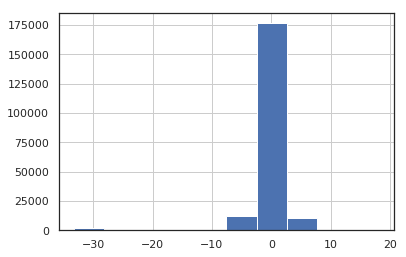

In [44]:
train["target"].hist();

<Figure size 432x288 with 0 Axes>

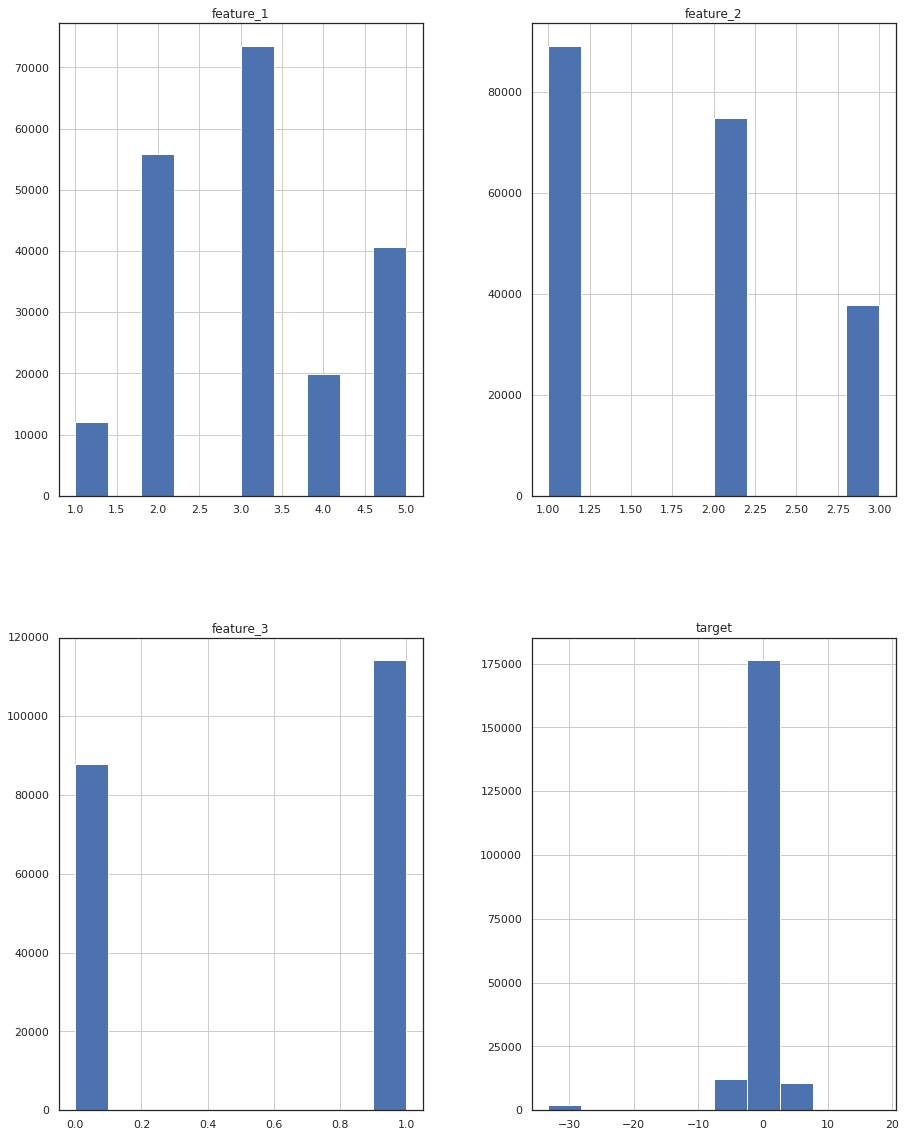

<Figure size 432x288 with 0 Axes>

In [81]:
# histograms
train.hist(figsize=(15,20))
plt.figure()

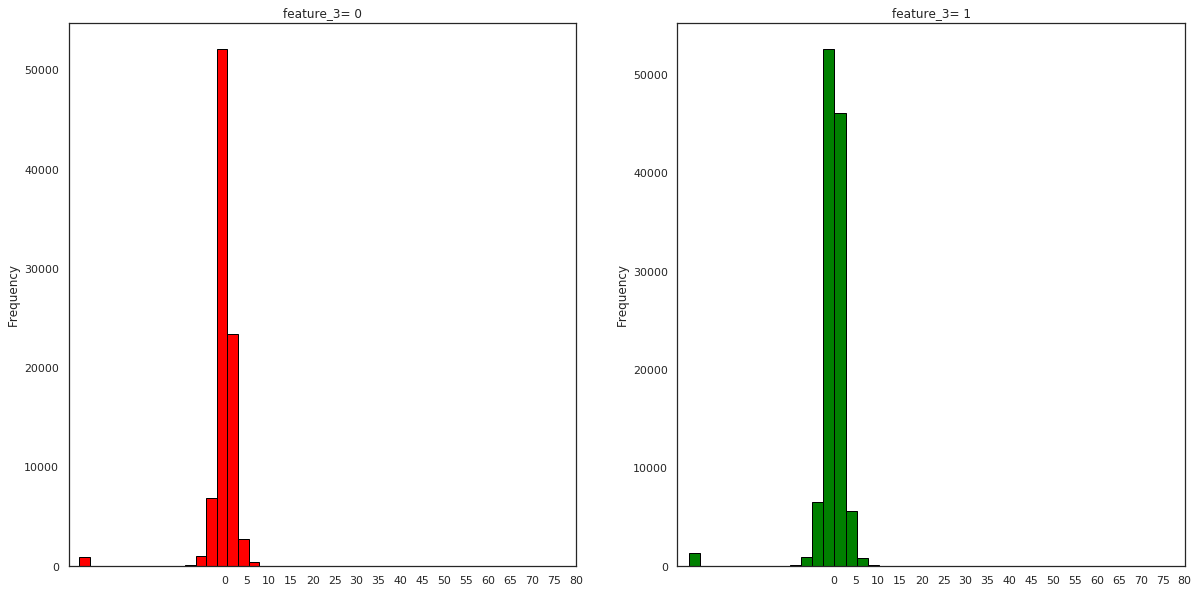

In [84]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['feature_3']==0].target.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('feature_3= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['feature_3']==1].target.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('feature_3= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

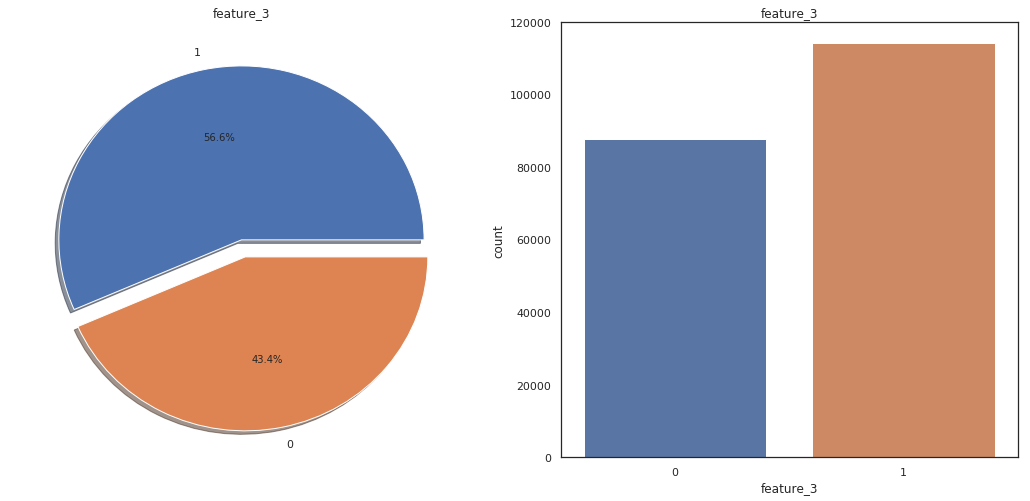

In [85]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['feature_3'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('feature_3')
ax[0].set_ylabel('')
sns.countplot('feature_3',data=train,ax=ax[1])
ax[1].set_title('feature_3')
plt.show()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['feature_3','feature_2']].groupby(['feature_3']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs feature_2')
sns.countplot('feature_3',hue='feature_2',data=train,ax=ax[1])
ax[1].set_title('feature_3:feature')
plt.show()

## 6-4-2  distplot

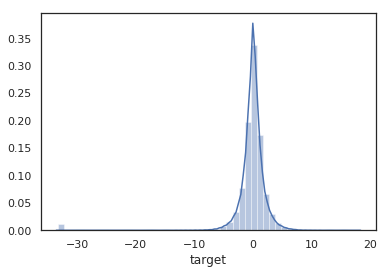

In [45]:
sns.distplot(train['target'])

## 6-4-3 violinplot

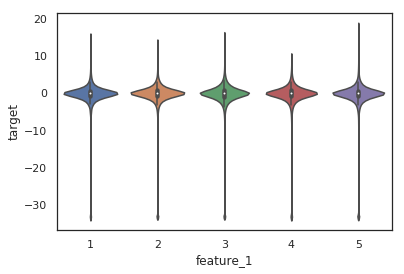

In [46]:
sns.violinplot(data=train, x="feature_1", y='target')

## 6-2-4 Scatter plot
Scatter plot Purpose to identify the type of relationship (if any) between two quantitative variables

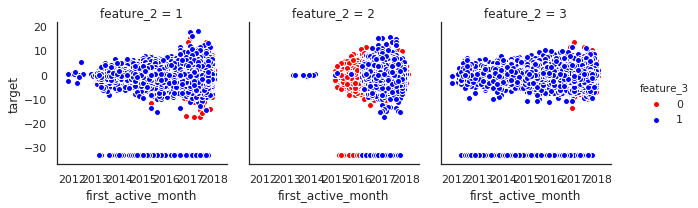

In [65]:
# Modify the graph above by assigning each species an individual color.
g = sns.FacetGrid(train, hue="feature_3", col="feature_2", margin_titles=True,
                  palette={1:"blue", 0:"red"} )
g=g.map(plt.scatter, "first_active_month", "target",edgecolor="w").add_legend();


## 6-4-5 Box
In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram.[wikipedia]

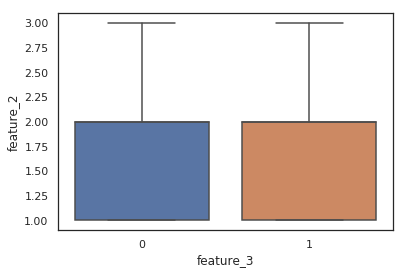

In [80]:
sns.boxplot(x="feature_3", y="feature_2", data=test )
plt.show()

<a id="24"></a> <br>
## 7- Apply Learning
How to understand what is the best way to solve our problem?!

The answer is always "**It depends**." It depends on the **size**, **quality**, and **nature** of the **data**. It depends on what you want to do with the answer. It depends on how the **math** of the algorithm was translated into instructions for the computer you are using. And it depends on how much **time** you have. Even the most **experienced data scientists** can't tell which algorithm will perform best before trying them.(see a nice [cheatsheet](https://github.com/mjbahmani/10-steps-to-become-a-data-scientist/blob/master/cheatsheets/microsoft-machine-learning-algorithm-cheat-sheet-v7.pdf) for this section)
Categorize the problem
The next step is to categorize the problem. This is a two-step process.

1. **Categorize by input**:
    1. If you have labelled data, it’s a supervised learning problem.
    1. If you have unlabelled data and want to find structure, it’s an unsupervised learning problem.
    1. If you want to optimize an objective function by interacting with an environment, it’s a reinforcement learning problem.
1. **Categorize by output**.
    1. If the output of your model is a number, it’s a regression problem.
    1. If the output of your model is a class, it’s a classification problem.
    1. If the output of your model is a set of input groups, it’s a clustering problem.
    1. Do you want to detect an anomaly ? That’s anomaly detection
1. **Understand your constraints**
    1. What is your data storage capacity? Depending on the storage capacity of your system, you might not be able to store gigabytes of classification/regression models or gigabytes of data to clusterize. This is the case, for instance, for embedded systems.
    1. Does the prediction have to be fast? In real time applications, it is obviously very important to have a prediction as fast as possible. For instance, in autonomous driving, it’s important that the classification of road signs be as fast as possible to avoid accidents.
    1. Does the learning have to be fast? In some circumstances, training models quickly is necessary: sometimes, you need to rapidly update, on the fly, your model with a different dataset.
1. **Find the available algorithms**
    1. Now that you a clear understanding of where you stand, you can identify the algorithms that are applicable and practical to implement using the tools at your disposal. Some of the factors affecting the choice of a model are:

    1. Whether the model meets the business goals
    1. How much pre processing the model needs
    1. How accurate the model is
    1. How explainable the model is
    1. How fast the model is: How long does it take to build a model, and how long does the model take to make predictions.
    1. How scalable the model is


<a id="25"></a> <br>
# 8- Conclusion
This kernel is not completed yet , I have tried to cover all the parts related to the process of **Elo  problem** with a variety of Python packages and I know that there are still some problems then I hope to get your feedback to improve it.


you can Fork and Run this kernel on **Github**:
> ###### [ GitHub](https://github.com/mjbahmani/10-steps-to-become-a-data-scientist)


#### The kernel is not completed and will be updated soon  !!!